In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np 

In [11]:
NEG_INF = 0

In [12]:
class Env:
    index_to_direction = [
        [ 0,-1],
        [ 0, 1],
        [-1, 0],
        [ 1, 0]]
    
    def __init__(self, n = 5,start_x = 3,start_y = 3,end_states = {(0,0)},random_start = False):
        self.start_x = start_x
        self.start_y = start_y
        self.x = self.start_x
        self.y = self.start_y
        self.n = n
        self.end_states = end_states
        self.random_start = random_start
        
    def get_next_state(self,action):
        tx = self.x + self.index_to_direction[action][0]
        ty = self.y + self.index_to_direction[action][1]
            
        return (tx,ty)
    
    def is_valid(self,x,y):
        if x < 0 or x >= self.n or y < 0 or y >= self.n:
            return False
        return True
        
    def reset(self):
        if self.random_start:
            self.x = random.randint(0,self.n-1)
            self.y = random.randint(0,self.n-1)
        else:
            self.x = self.start_x
            self.y = self.start_y
        return (self.x,self.y)
    
    def get_all_actions(self):
        return [i for i in range(len(self.index_to_direction))]
    
    def get_actions(self):
        actions = []
        for i in range(len(self.index_to_direction)):
            if self.is_valid(self.x + self.index_to_direction[i][0],self.y + self.index_to_direction[i][1]):
                actions.append(i)
        return actions
    
    
    def get_actions_at_state(self,state):
        actions = []
        for i in range(len(self.index_to_direction)):
            if self.is_valid(state[0] + self.index_to_direction[i][0],state[1] + self.index_to_direction[i][1]):
                actions.append(i)
        return actions
    
    def get_random_action_at_state(self,state):
        return random.choice(self.get_actions_at_state(state))
    
    def get_random_action(self):
        return random.choice(self.get_actions())
    
    def step(self,action):
        self.x = self.x + self.index_to_direction[action][0]
        self.y = self.y + self.index_to_direction[action][1]
        
        reward = -1
        done = False
        if (self.x,self.y) in self.end_states:
            reward = 0
            done = True
            
        return (self.x,self.y),reward,done,None
            

In [13]:

def print_state_action():
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)

        
    
    for i in range(env.n):
        for j in range(env.n):
            for action in env.get_all_actions():
                sa = ((i,j),action)
                if (sa) in state_action:
                    g[i][j] = max(g[i][j],state_action[sa])
    
    
    for i in range(env.n):
        for j in range(env.n):
            if(g[i][j] == -9999.0):
                g[i][j] = 0
    
    
    
    for i in range(env.n):
        for j in range(env.n):
            print("%-3.2f "%(g[i][j]),end="")
        print()


        
def print_heat_map():
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)

        
    
    for i in range(env.n):
        for j in range(env.n):
            for action in env.get_all_actions():
                sa = ((i,j),action)
                if (sa) in state_action:
                    g[i][j] = max(g[i][j],state_action[sa])
    
    
    for i in range(env.n):
        for j in range(env.n):
            if(g[i][j] == -9999.0):
                g[i][j] = 0
    
#     for i in range(env.n):
#         for j in range(env.n):
#             print("%-3.2f "%(g[i][j]),end="")
#         print()

    
    a = np.array(g)
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()

In [14]:

def set_state_action(sa):
    global state_action
    if sa not in state_action:
        state_action[sa] = NEG_INF

def get_action(obs):
    global env
    
    t = random.random()
    if t < exploration:
        return env.get_random_action_at_state(obs)
    else:
        act = env.get_random_action_at_state(obs)
        val = NEG_INF
        for action in env.get_actions_at_state(obs): 
            sa = (obs,action)
            set_state_action(sa)
            if state_action[sa] > val:
                act = action
                val = state_action[sa]
            
        return act

## This is SARSA
def update_state_action(n,states,actions,rewards):
    current_sa = (states[0],actions[0])
    set_state_action(current_sa)
    
    total_rewards = 0
    for i in range(len(rewards)):
        total_rewards += pow(discount_rate,i+1) * rewards[i]
    
    next_action = get_action(states[-1])
    next_sa = (states[-1],next_action)  
    set_state_action(next_sa)

    
#     print(states,actions,rewards,state_action[current_sa])
#     print(current_sa,total_rewards + pow(discount_rate,n)*state_action[next_sa],state_action[current_sa])
    
    state_action[current_sa] = state_action[current_sa] + learning_rate*(total_rewards + pow(discount_rate,n)*state_action[next_sa] - state_action[current_sa]) 
#     print(state_action[current_sa])

    

In [15]:
def train(n,no_episodes = 10,episode_length = 10):
    global exploration,env

    for ep in range(no_episodes):
        states = []
        actions = []
        rewards = []
        
        obs = env.reset()
        if obs in env.end_states:
            continue
        
        
        for i in range(episode_length):
            action = get_action(obs)
            new_obs, reward, done, _ = env.step(action)
            
            states.append(obs)
            actions.append(action)
            rewards.append(reward)
            obs = new_obs
            if len(states) > n:
                states = states[1:]
                actions = actions[1:]
                rewards = rewards[1:]
            
            if len(states) < n:
                continue
            
            if done:
                break
                
            update_state_action(n,states,actions,rewards)
            
            if done:
                break
#         print("#"*10+" EP OVER " + "#"*10)
        exploration = exploration * 0.999


In [31]:
## (state,action) -> reward
state_action = {}

exploration = 0.7
learning_rate = 0.4
discount_rate = 1
n = 12
env = Env(n=15,start_x = 2,start_y = 2,end_states = {(0,0),(4,7)},random_start=True)

In [32]:
train(n,2000,30)

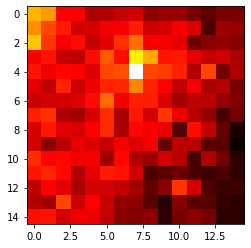

In [33]:
print_heat_map()


In [45]:
exploration

0.19408619345261716

In [46]:
state_action

{((2, 2), 0): -9.085623482428739,
 ((2, 2), 2): -9.55743046505059,
 ((1, 2), 0): -4.772364,
 ((1, 2), 2): -7.7879213643308765,
 ((1, 2), 3): -9.680326548937606,
 ((1, 1), 0): -5.120625931074919,
 ((1, 1), 1): -5.0029452,
 ((1, 1), 2): -3.0274799999999997,
 ((1, 1), 3): -3.924503371716,
 ((1, 0), 1): -1.8119999999999998,
 ((1, 0), 2): 0,
 ((1, 0), 3): -5.429997841468103,
 ((2, 0), 1): -4.928974687497361,
 ((2, 0), 2): -6.82681491388452,
 ((2, 1), 0): -7.407886936301172,
 ((2, 1), 1): -9.430888306136618,
 ((2, 1), 2): -7.7011905240075444,
 ((0, 1), 0): 0,
 ((0, 1), 1): 0,
 ((0, 1), 3): -1.2,
 ((0, 2), 0): -6.23628618345444,
 ((0, 2), 3): -4.8503660808903515}